# Objetivo

Analizar la base de datos **dataset_SCL.csv** que contiene información de los vuelos, en el dataset se encuentran las siguiente columnas con su descripción:

| Variable | Descripción |
| :- | :- |
| **Fecha-I**  | Fecha y hora programada del vuelo.
| **Vlo-I** | Número de vuelo programado.
| **Ori-I** | Código de ciudad de origen programado.
| **Des-I** | Código de ciudad de destino programado.
| **Emp-I** | Código aerolínea de vuelo programado.
| **Fecha-O** | Fecha y hora de operación del vuelo.
| **Vlo-O** | Número de vuelo de operación del vuelo.
| **Ori-O** | Código de ciudad de origen de operación.
| **Des-O** | Código de ciudad de destino de operación.
| **Emp-O** | Código aerolínea de vuelo operado.
| **DIA** | Día del mes de operación del vuelo.
| **MES** | Número de mes de operación del vuelo.
| **AÑO** | Año de operación del vuelo.
| **DIANOM** | Día de la semana de operación del vuelo.
| **TIPOVUELO** | Tipo de vuelo, I = Internacional, N = Nacional
| **OPERA** | Nombre de aerolínea que opera.
| **SIGLAORI** | Nombre de ciudad de origen.
| **SIGLADES** | Nombre ciudad destino.

In [2]:
# Librerías a utilizar
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [ ]:
def diff_minutes(start,end):
    """
    Calcula la diferencia en minutos entre dos fechas
    Argumentos:
        - start: str = Fecha en formato %Y-%m-%d %H:%M:%S
        - end: str = Fecha en formato %Y-%m-%d %H:%M:%S
    Salida:
        - minutos de diferencia (float)
        """
    start_norm = datetime.strptime(start,"%Y-%m-%d %H:%M:%S")
    end_norm = datetime.strptime(end,"%Y-%m-%d %H:%M:%S")
    minutes_diff = (end_norm - start_norm).total_seconds() / 60.0
    return minutes_diff

In [3]:
# Cambio de directorio
os.chdir("..")

In [70]:
# Lectura de la data
df_scl = pd.read_csv("data/dataset_SCL.csv")

/var/folders/kt/xwwd0rh10zsbnr8m5w8dm9gh0000gs/T/ipykernel_45275/3288715273.py:2: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_scl = pd.read_csv("data/dataset_SCL.csv")


In [71]:
# Normalización de las columnas
df_scl.columns = [col.upper().replace("-","_") for col in df_scl.columns]
df_scl = df_scl.rename({"AÑO":"YEAR"},axis=1)

In [72]:
# Revisar cantidad de filas y columnas del dataset
df_scl.shape

(68206, 18)

In [76]:
df_scl.head()

,FECHA_I,VLO_I,ORI_I,DES_I,EMP_I,FECHA_O,VLO_O,ORI_O,DES_O,EMP_O,DIA,MES,YEAR,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,dif_min
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,3.0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,9.0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,9.0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,3.0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,-2.0


In [87]:
df_scl.SIGLAORI.value_counts().reset_index().rename({"SIGLAORI":"conteo","index":"sigla_ori"},axis=1).head(10)

,sigla_ori,conteo
0,Santiago,68206


In [86]:
df_scl.SIGLADES.value_counts().reset_index().rename({"SIGLADES":"conteo","index":"sigla_des"},axis=1).head(10)

,sigla_des,conteo
0,Buenos Aires,6335
1,Antofagasta,5786
2,Lima,5270
3,Calama,5146
4,Puerto Montt,4357
5,Concepcion,3993
6,Iquique,3747
7,Sao Paulo,3569
8,Temuco,2589
9,Arica,2436


### Supuesto
Se considera la fecha de operación la cual se realizó el vuelo, para esto es de interés saber cuantos vuelos tuvieron retraso, por lo que procedemos a calcular la diferencia entre la fecha de operación y la fecha programada del vuelo $$Fecha_O - Fecha_I$$.


In [73]:
df_scl['dif_min'] = df_scl.apply(lambda row: diff_minutes(start=row['FECHA_I'], end=row['FECHA_O']), axis=1)

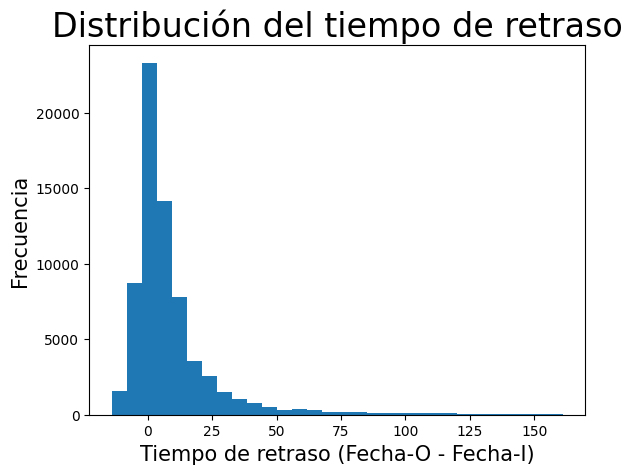

In [74]:
plt.title('Distribución del tiempo de retraso',fontsize=24)
df_scl.dif_min.plot(kind="hist",bins=30)
plt.ylabel("Frecuencia",fontsize=15)
plt.xlabel("Tiempo de retraso (Fecha-O - Fecha-I)",fontsize=15)
plt.show()

In [68]:
# Presencia de datos negativos, datos outliers, asimetría hacia la derecha.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


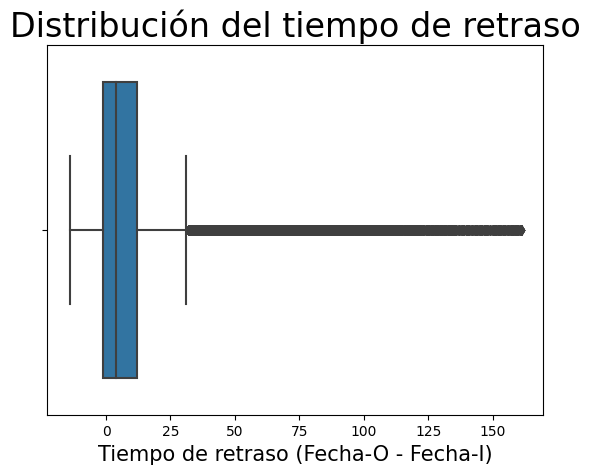

In [90]:
plt.title('Distribución del tiempo de retraso',fontsize=24)
sns.boxplot(df_scl.dif_min)
plt.xlabel("Tiempo de retraso (Fecha-O - Fecha-I)",fontsize=15)
plt.show()

In [104]:
def get_outliers(df):
    """
    Entrada:
    - df float: Entrada numérica
    Salida
    - tuple: (Outliers, Not Outliers)
    """
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers, not_outliers

In [107]:
x, y = get_outliers(df_scl.dif_min)

In [112]:
df_scl.dif_min

0         3.0
1         9.0
2         9.0
3         3.0
4        -2.0
         ... 
68201    46.0
68202    16.0
68203    40.0
68204    13.0
68205     9.0
Name: dif_min, Length: 68206, dtype: float64